# Ray Tracing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H = 400 # Height of planes
W = 400 # Width of planes
f = 1200 # Focal Length

## Refrence Diagrams
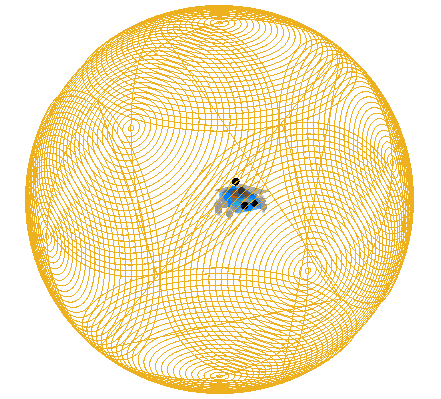 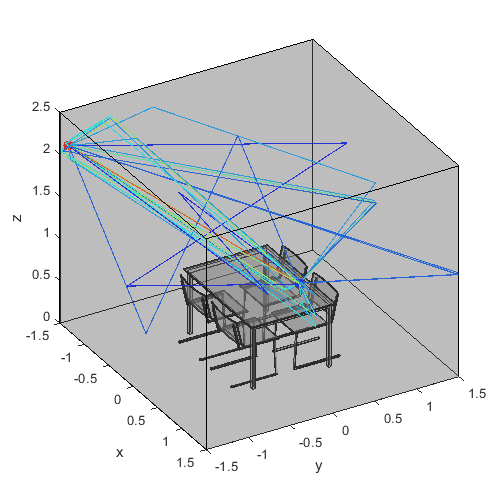 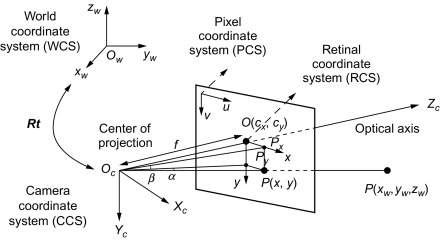

## Tracing rays with NumPY Meshgrid

In [3]:
# Computing origin of each pixel as ray

rays_o = np.zeros((H*W, 3)) # Start of ray [H,W,3] for 3D
rays_d = np.zeros((H*W, 3))

u = np.arange(W) # 1D x axis
v = np.arange(H) # 1D y axis

# Pixel coordinates in x and y directions
u, v = np.meshgrid(u, v) # 2D

# Creating mapping coordinates for u and v
print(u)
print('-'*40)
print(v)

# Calculating from the center (shifting origin to the center in 3D space)
dirs = np.stack((u - W / 2,
                 -(v - H / 2),
                 - np.ones_like(u) * f), axis=-1) # [x,y,z]

# Normalizing
rays_d = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)
rays_d = rays_d.reshape(-1, 3)

[[  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 ...
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]]
----------------------------------------
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [397 397 397 ... 397 397 397]
 [398 398 398 ... 398 398 398]
 [399 399 399 ... 399 399 399]]


### Visualization of X Plane

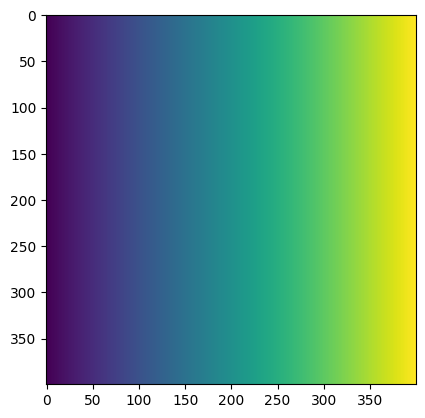

In [5]:
plt.imshow(u)

### Visualization of Y Plane

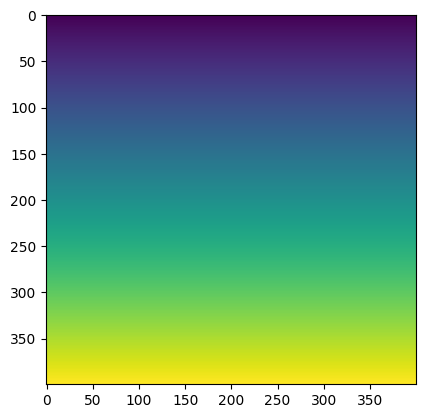

In [6]:
plt.imshow(v)

### 2D Pixel Coordinate Map

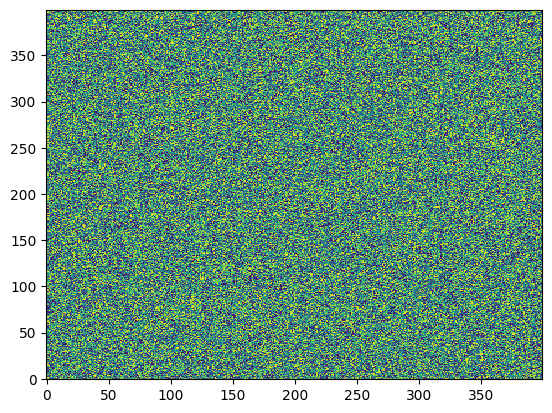

In [13]:
plt.pcolormesh(u, v, np.random.rand(H,W))

### 3D Pixel Coordinate Map with Focal Length

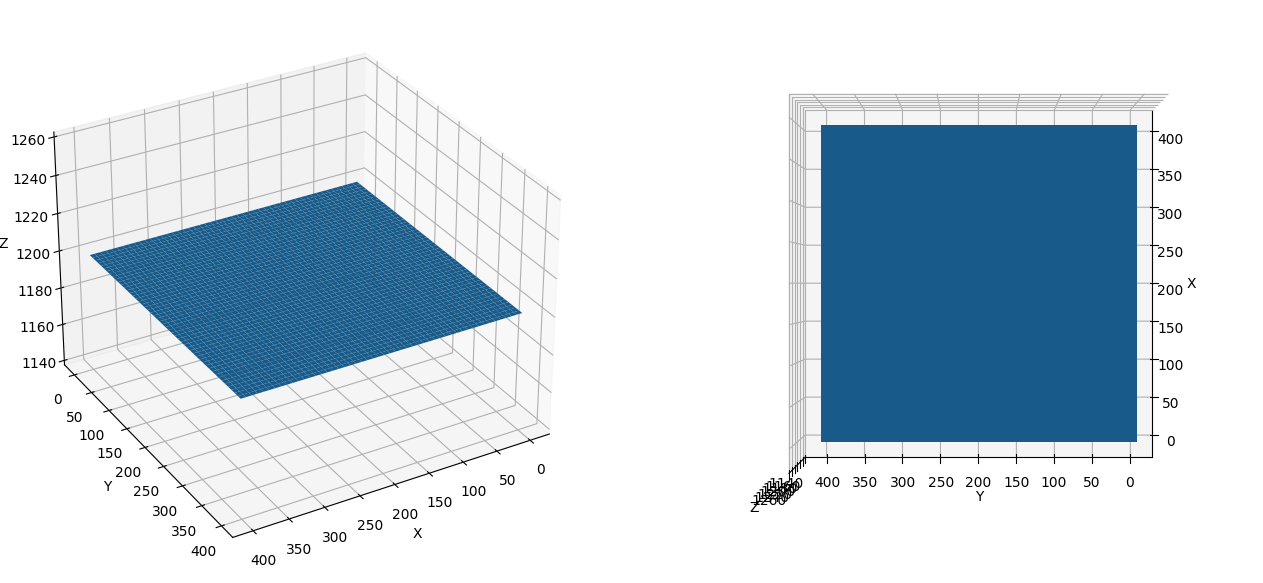

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

H = 400
W = 400

# 2D plane mapping
u, v = np.meshgrid(np.arange(W), np.arange(H))

# 3D with focal length
z = np.ones_like(u) * f

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax.plot_surface(u, v, z)
ax2.plot_surface(u, v, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Adjust angle
ax.view_init(elev=30, azim=60)
ax2.view_init(elev=90, azim=180)
plt.show()

## Plotting

In [31]:
def plot_rays(o, d, t):
    
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection='3d')
    
    pt1 = o
    
    # Passage of time * direction = tracking
    pt2 = o + t * d
    x = 50
    
    # Plotting in intervals of x
    for p1, p2 in zip(pt1[::x], pt2[::x]):
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])
    
    
    plt.show()

[[-0.16222142  0.16222142 -0.97332853]
 [-0.1614315   0.16224272 -0.9734563 ]
 [-0.16064128  0.16226391 -0.97358349]
 ...
 [ 0.15987174 -0.1614948  -0.973838  ]
 [ 0.16066237 -0.1614738  -0.97371136]
 [ 0.1614527  -0.1614527  -0.97358413]]


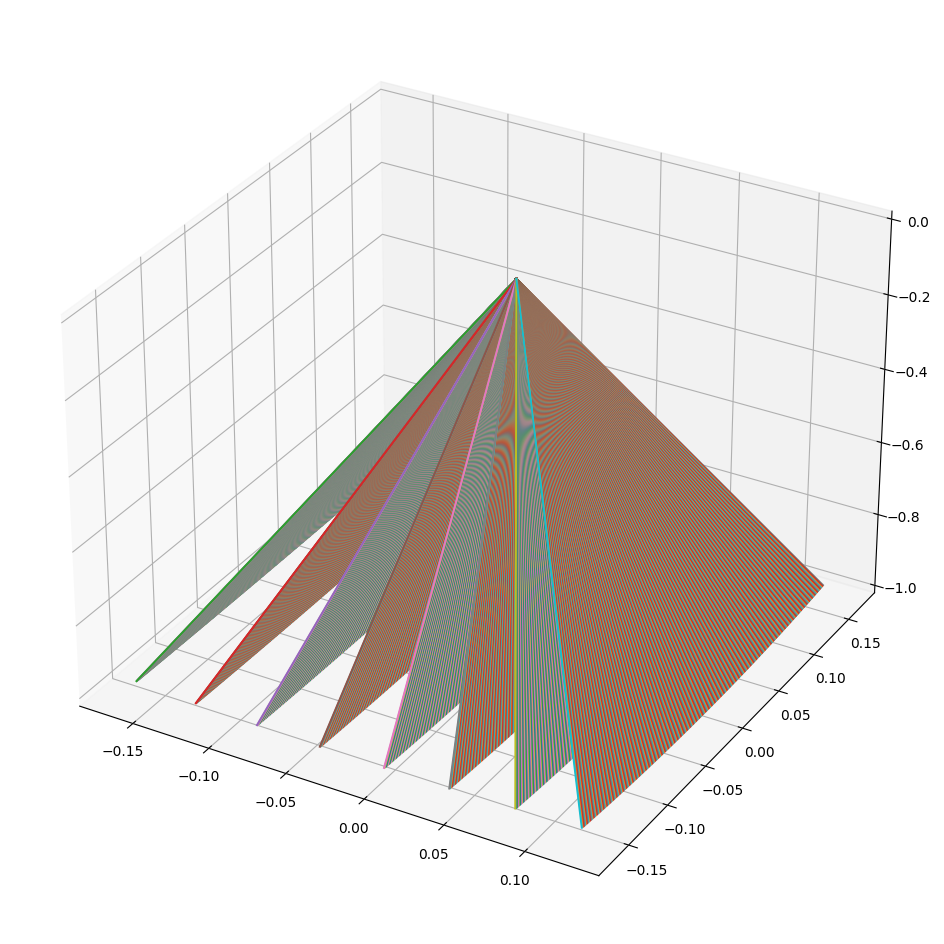

In [32]:
# origin at 200, 200 for 400x400 field
plot_rays(rays_o, rays_d, 1)

# Rendering a Sphere

## Tri-mesh Rendering

In [1]:
class Sphere():
    
    def __init__(self, p, r, c):
        self.p = p
        self.r = r
        self.c = c
    
    # Rays are shot and intersection of ray with object is computed
    def intersect(self, o, d):
        
        # Solve equation at^2 + bt + c = 0
        # (ox + t * dx  - xc)^2 + (oy + t * dy-yc)^2 + (oz + t * dz-zc)^2 = r^2 
        
        # Intersection in x axis, y axis, z axis
        a = d[:, 0]**2 + d[:, 1]**2 + d[:, 2]**2
        
        b = 2 * ((d[:, 0] * (o[:, 0] - self.p[0])) + (d[:, 1] * (o[:, 1] - self.p[1])) + (d[:, 2] * (o[:, 2] - self.p[2])))
        
        c = (o[:, 0] - self.p[0])**2 + (o[:, 1] - self.p[1])**2 + (o[:, 2] - self.p[2])**2 - self.r**2
        
        pho = b**2 - 4 * a * c
        cond = pho >= 0
        
        num_rays = o.shape[0]
        colors = np.zeros((num_rays, 3))
        colors[cond] = self.c
        
        return colors

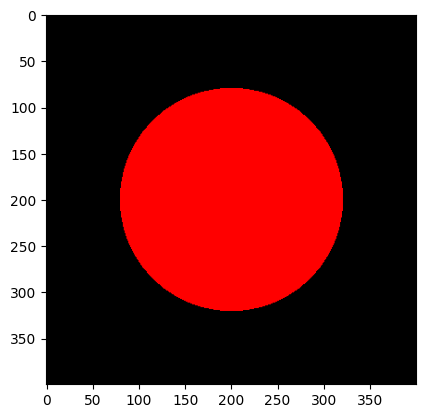

In [7]:
s = Sphere(np.array([0., 0., -1.]), .1, np.array([1., 0., 0.]))
img = s.intersect(rays_o, rays_d)
img = img.reshape(H, W, 3)

plt.figure()
plt.imshow(img)
plt.show()

## Volumetric Rendering
Density based rendering. Uses colour and desnity, high density = existence of pixel, low = empty

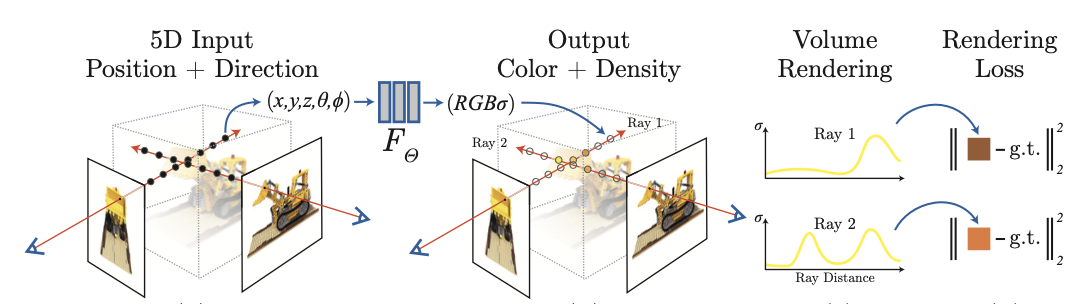

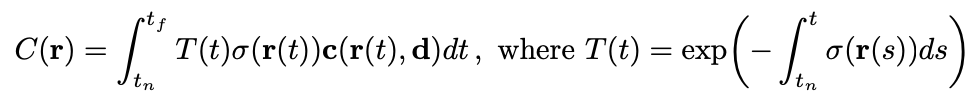

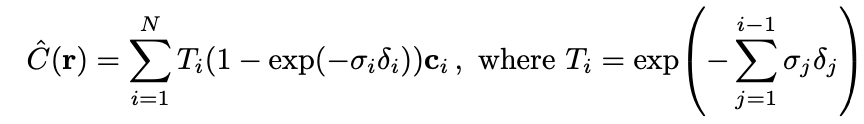

In [17]:
import torch

In [18]:
class Sphere():
    
    def __init__(self, p, r, c):
        
        # pos, radius, colour
        self.p = p
        self.r = r
        self.c = c
        
    def intersect(self, x):     
        # (x-xc)^2 + (y-yc)^2 + (z-zc)^2 <= r^2 
        
        # Only track the rays that intersect with the radius
        cond = (x[:, 0] - self.p[0])**2 + (x[:, 1] - self.p[1])**2 + (x[:, 2] - self.p[2])**2 <= self.r**2
                
        num_rays = x.shape[0]
        colors = torch.zeros((num_rays, 3))
        density = torch.zeros((num_rays, 1))
        
        colors[cond] = self.c
        density[cond] = 10
        
        return colors, density

In [19]:
def compute_accumulated_transmittance(betas):
    
    # Calculates the density ray has accumlated, causes occlusion
    accumulated_transmittance = torch.cumprod(betas, 1) 
    accumulated_transmittance[:, 0] = 1.
    return accumulated_transmittance

def rendering(model, rays_o, rays_d, tn, tf, nb_bins=100, device='cpu'):
    
    # goes from tn to tf with a number of integration bins
    # higher bins more precise integration
    t = torch.linspace(tn, tf, nb_bins).to(device) # [nb_bins]
    
    # First derivative (t_i+1 - t_i)
    delta = torch.cat((t[1:] - t[:-1], torch.tensor([1e10]))) # Last value set to inf
    
    # Position of the rays
    x = rays_o.unsqueeze(1) + t.unsqueeze(0).unsqueeze(-1) * rays_d.unsqueeze(1) # [nb_rays, nb_bins, 3]
    
    colors, density = model.intersect(x.reshape(-1, 3))
    
    colors = colors.reshape((x.shape[0], nb_bins, 3)) # [nb_rays, nb_bins, 3]
    density = density.reshape((x.shape[0], nb_bins))
    
    alpha = 1 - torch.exp(- density * delta.unsqueeze(0)) # [nb_rays, nb_bins, 1]
    T = compute_accumulated_transmittance(1 - alpha) # [nb_rays, nb_bins, 1]

    c = (T.unsqueeze(-1) * alpha.unsqueeze(-1) * colors).sum(1) # [nb_rays, 3]
    
    return c

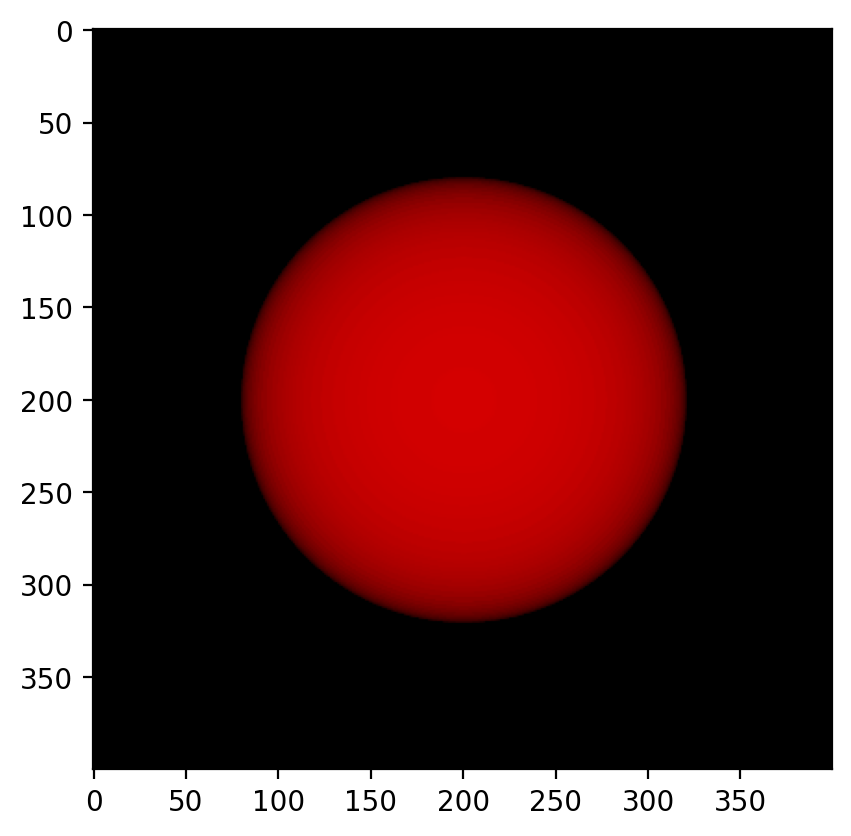

In [41]:
model = Sphere(torch.tensor([0, 0, -1]), 0.1, torch.tensor([1., 0., 0.]))
px_colors = rendering(model, torch.from_numpy(rays_o), torch.from_numpy(rays_d), 0.8, 1.2)

img = px_colors.reshape(H, W, 3).cpu().numpy()

plt.figure(dpi=200)
plt.imshow(img)